In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Read in Data File

In [3]:
# Read in the cleaned data file

delays = pd.read_parquet('./drive/MyDrive/Colab Notebooks/cleaned_delays_export_100.parquet')

In [4]:
# View the first five rows of the data

delays.head()

,year,month,day_of_week,op_carrier,origin,dest,crs_dep_time,dep_time,dep_delay_new,crs_arr_time,arr_time,arr_delay_new,crs_elapsed_time,actual_elapsed_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,flight_delay
0,2019,12,4,American,TPA,DFW,1355,1410,15.0,1550,1557,7.0,175.0,167.0,929.0,0,0,0,0,0,1
1,2019,12,1,Skywest,MCI,SLC,820,820,0.0,1023,1003,0.0,183.0,163.0,920.0,0,0,0,0,0,0
2,2019,12,4,Southwest,LAX,ELP,1855,1852,0.0,2145,2129,0.0,110.0,97.0,715.0,0,0,0,0,0,0
3,2019,12,3,Delta,RDU,BOS,605,601,0.0,803,758,0.0,118.0,117.0,612.0,0,0,0,0,0,0
4,2019,12,3,United,LAX,IAH,600,556,0.0,1115,1102,0.0,195.0,186.0,1379.0,0,0,0,0,0,0


In [5]:
# View the size of the data frame

delays.shape

(11887768, 21)

In [6]:
# View the percentage of delayed flights

delays['flight_delay'].value_counts(normalize = True)

0    0.646676
1    0.353324
Name: flight_delay, dtype: float64

# Function to Print Results

In [12]:
def print_results(model):
  print(f'Train score: {model.score(X_train, y_train)}')
  print(f'Test score: {model.score(X_test, y_test)}')

  # Generate predictions
  test_preds = model.predict(X_test)
  train_preds = model.predict(X_train)
  print(f'Train Accuracy score: {accuracy_score(y_train, train_preds)}')
  print(f'Test Accuracy score: {accuracy_score(y_test, test_preds)}')
  print(classification_report(y_test, test_preds))

  cm = confusion_matrix(y_test, test_preds)

  print(ConfusionMatrixDisplay(cm, display_labels = ['Not Delayed', 'Delayed']).plot());

# Set up X and y Variables

In [7]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

# Train/Test Split

In [11]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

# XGBoost

## Model 1: Defaults Top 25 Airports

In [12]:
# Set up a pipeline with one hot encoder, xgboost

pipe = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier())
])

In [13]:
pipe.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=3,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [14]:
print(f'Train score: {pipe.score(X_train, y_train)}')
print(f'Test score: {pipe.score(X_test, y_test)}')

Train score: 0.6331921220873182
Test score: 0.6331419727812229


## Model 2: max_depth = 15, n_estimators = 200 Top 25 Airports

In [15]:
# Set up a pipeline with one hot encoder, xgboost

pipe_2 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 15, n_estimators = 200))
])

In [16]:
pipe_2.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [17]:
print(f'Train score: {pipe_2.score(X_train, y_train)}')
print(f'Test score: {pipe_2.score(X_test, y_test)}')

Train score: 0.6626885879706429
Test score: 0.6518535636308196


## Model 3: max_depth = 15, n_estimators = 200 remove month and day of week Top 25 Airports

In [18]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'month',
                           'day_of_week',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [19]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [20]:
# Set up a pipeline with one hot encoder, xgboost

pipe_3 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 15, n_estimators = 200))
])

In [21]:
pipe_3.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

In [22]:
print(f'Train score: {pipe_3.score(X_train, y_train)}')
print(f'Test score: {pipe_3.score(X_test, y_test)}')

Train score: 0.6484779677854254
Test score: 0.6440712908351176


## Model 4: max_depth = 20, n_estimators = 300 Top 25 Airports

In [8]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [9]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [10]:
# Set up a pipeline with one hot encoder, xgboost

pipe_4 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 20, n_estimators = 300))
])

In [11]:
pipe_4.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=20,
                               min_child_weight=1, missing=None,
                               n_estimators=300, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=1))],
         verbose=False)

Train score: 0.681334992837157
Test score: 0.6585273707597114
Accuracy score: 0.6585273707597114
              precision    recall  f1-score   support

           0       0.66      0.93      0.78    659542
           1       0.62      0.19      0.29    383341

    accuracy                           0.66   1042883
   macro avg       0.64      0.56      0.53   1042883
weighted avg       0.65      0.66      0.60   1042883



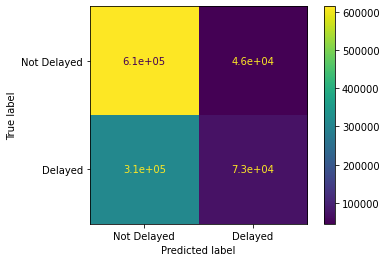

In [14]:
print_results(pipe_4)

## Model 5: max_depth = 15 n_estimators = 100 Top 100 Airports

In [8]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [9]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [10]:
# Set up a pipeline with one hot encoder, xgboost

pipe_5 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 15, verbosity = 3))
])

In [11]:
pipe_5.fit(X_train, y_train)

[18:11:33] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[18:12:40] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7006 extra nodes, 0 pruned nodes, max_depth=15
[18:13:43] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6510 extra nodes, 0 pruned nodes, max_depth=15
[18:14:47] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6622 extra nodes, 0 pruned nodes, max_depth=15
[18:15:50] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6394 extra nodes, 0 pruned nodes, max_depth=15
[18:16:54] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6438 extra nodes, 0 pruned nodes, max_depth=15
[18:17:58] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6024 extra nodes, 0 pruned nodes, max_dep

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=1, missing=None,
                               n_estimators=100, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=3))],
         verbose=False)

Train score: 0.6587902231380469
Test score: 0.6556379633249909
Accuracy score: 0.6556379633249909
              precision    recall  f1-score   support

           0       0.66      0.98      0.79   1921885
           1       0.64      0.06      0.11   1050057

    accuracy                           0.66   2971942
   macro avg       0.65      0.52      0.45   2971942
weighted avg       0.65      0.66      0.55   2971942



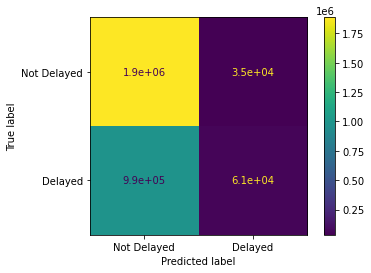

In [12]:
print_results(pipe_5)

## Model 6: max_depth = 15 n_estimators = 200 Top 100 Airports

In [13]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [14]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [15]:
# Set up a pipeline with one hot encoder, xgboost

pipe_6 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 15, n_estimators = 200, verbosity = 3))
])

In [16]:
pipe_6.fit(X_train, y_train)

[20:00:27] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[20:01:34] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 7006 extra nodes, 0 pruned nodes, max_depth=15
[20:02:39] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6510 extra nodes, 0 pruned nodes, max_depth=15
[20:03:44] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6622 extra nodes, 0 pruned nodes, max_depth=15
[20:04:49] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6394 extra nodes, 0 pruned nodes, max_depth=15
[20:05:57] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6438 extra nodes, 0 pruned nodes, max_depth=15
[20:07:03] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 6024 extra nodes, 0 pruned nodes, max_dep

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=15,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=3))],
         verbose=False)

Train score: 0.666376059828893
Test score: 0.6610633720308136
Accuracy score: 0.6610633720308136
              precision    recall  f1-score   support

           0       0.66      0.97      0.79   1921885
           1       0.63      0.10      0.17   1050057

    accuracy                           0.66   2971942
   macro avg       0.65      0.53      0.48   2971942
weighted avg       0.65      0.66      0.57   2971942



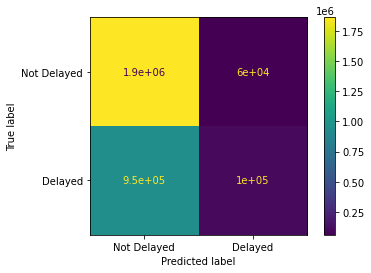

In [18]:
print_results(pipe_6)

## Model 7 max_depth = 20 n_estimators = 200 Top 100 Airports

In [8]:
# Set up X and y variables for the model

X = delays.drop(columns = ['year',
                           'dep_time', 
                           'dep_delay_new', 
                           'arr_time', 
                           'arr_delay_new', 
                           'actual_elapsed_time', 
                           'carrier_delay', 
                           'weather_delay',
                           'nas_delay',
                           'security_delay',
                           'late_aircraft_delay',
                           'flight_delay'])


y = delays['flight_delay']

In [9]:
# Create train test split on data

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y)

In [10]:
# Set up a pipeline with one hot encoder, xgboost

pipe_7 = Pipeline([
    ('ohe', OneHotEncoder(handle_unknown = 'ignore')),
    ('xgb', XGBClassifier(max_depth = 20, n_estimators = 200, verbosity = 3))
])

In [11]:
pipe_7.fit(X_train, y_train)

[14:28:53] WARNING: /workspace/src/learner.cc:686: Tree method is automatically selected to be 'approx' for faster speed. To use old behavior (exact greedy algorithm on single machine), set tree_method to 'exact'.
[14:30:27] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 22536 extra nodes, 0 pruned nodes, max_depth=20
[14:32:00] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20540 extra nodes, 0 pruned nodes, max_depth=20
[14:33:35] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 20520 extra nodes, 0 pruned nodes, max_depth=20
[14:35:09] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 19170 extra nodes, 0 pruned nodes, max_depth=20
[14:36:41] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18456 extra nodes, 0 pruned nodes, max_depth=20
[14:38:15] INFO: /workspace/src/tree/updater_prune.cc:74: tree pruning end, 1 roots, 18712 extra nodes, 0 pruned nodes, m

Pipeline(memory=None,
         steps=[('ohe',
                 OneHotEncoder(categories='auto', drop=None,
                               dtype=<class 'numpy.float64'>,
                               handle_unknown='ignore', sparse=True)),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree',
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, gamma=0, learning_rate=0.1,
                               max_delta_step=0, max_depth=20,
                               min_child_weight=1, missing=None,
                               n_estimators=200, n_jobs=1, nthread=None,
                               objective='binary:logistic', random_state=0,
                               reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
                               seed=None, silent=None, subsample=1,
                               verbosity=3))],
         verbose=False)

Train score: 0.6757565703951602
Test score: 0.6650974346067319
Train Accuracy score: 0.6757565703951602
Test Accuracy score: 0.6650974346067319
              precision    recall  f1-score   support

           0       0.67      0.96      0.79   1921885
           1       0.63      0.13      0.21   1050057

    accuracy                           0.67   2971942
   macro avg       0.65      0.54      0.50   2971942
weighted avg       0.65      0.67      0.58   2971942



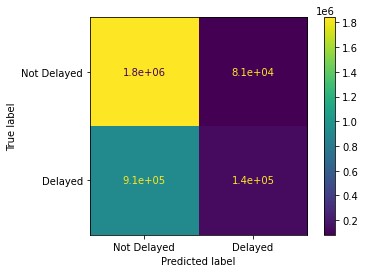

In [13]:
print_results(pipe_7)

# Export Model for Streamlit

In [15]:
with open('./drive/MyDrive/Colab Notebooks/xgboost_pipe.pkl', 'wb') as pickle_out:
    pickle_out = pickle.dump(pipe_7, pickle_out)